In [1]:
import festim
from fenics import plot
import matplotlib.pyplot as plt

# 1D meshes

## Mesh from vertices

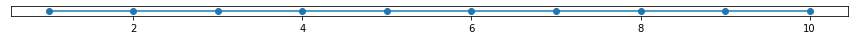

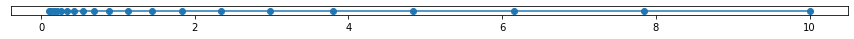

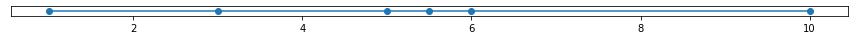

In [2]:
import numpy as np

# linspace
my_mesh = festim.MeshFromVertices(np.linspace(1, 10, num=10))

plt.figure(figsize=(15, 1))
plot(my_mesh.mesh)

# logspace
my_mesh = festim.MeshFromVertices(np.logspace(-1, 1, num=20))

plt.figure(figsize=(15, 1))
plot(my_mesh.mesh)

# custom
my_mesh = festim.MeshFromVertices([1, 3, 5, 5.5, 6, 10])

plt.figure(figsize=(15, 1))
plot(my_mesh.mesh)

## Iterative refinements

Meshing ...
Mesh size before local refinement is 10
Mesh size after local refinement is 25
Mesh size before local refinement is 25
Mesh size after local refinement is 33


<Figure size 4320x72 with 0 Axes>

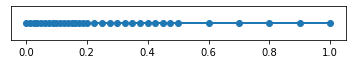

In [3]:
refinements = [
    {
        "cells": 6,
        "x": 0.5
    },
    {
        "cells": 5,
        "x": 0.2
    }
]

my_mesh = festim.MeshFromRefinements(10, size=1, refinements=refinements)

plt.figure(figsize=(60, 1))
plt.figure()
plot(my_mesh.mesh)

# 1D & 2D meshes

## Mesh created with FEniCS

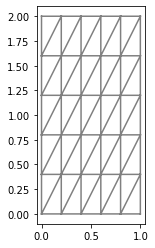

In [4]:
from fenics import Point, RectangleMesh, CompiledSubDomain, MeshFunction

# creating a mesh with FEniCS
nx = ny = 5
mesh_fenics = RectangleMesh(Point(0, 0), Point(1, 2), nx, ny)

# marking physical groups (volumes and surfaces)
volume_markers = MeshFunction("size_t", mesh_fenics, mesh_fenics.topology().dim())

tol = 1e-14
subdomain_1 = CompiledSubDomain('x[1] <= 0.5 + tol', tol=tol)
subdomain_2 = CompiledSubDomain('x[1] >= 0.5 - tol', tol=tol)

volume_markers.set_all(1)
subdomain_1.mark(volume_markers, 1)
subdomain_2.mark(volume_markers, 2)


left_surface = CompiledSubDomain('on_boundary && near(x[0], 0, tol)',
                                tol=tol)
right_surface = CompiledSubDomain('on_boundary && near(x[0], 1, tol)',
                                     tol=tol)
surface_markers = MeshFunction("size_t", mesh_fenics, mesh_fenics.topology().dim() - 1)
surface_markers.set_all(0)
left_surface.mark(surface_markers, 1)
right_surface.mark(surface_markers, 2)

# creating mesh with FESTIM
my_mesh = festim.Mesh(
    mesh=mesh_fenics,
    volume_markers=volume_markers,
    surface_markers=surface_markers
)

plt.figure()
plot(my_mesh.mesh)

## Mesh from XDMF file

Succesfully load mesh with 50 cells


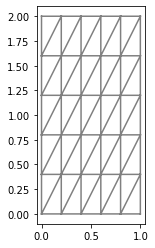

In [5]:
# create an XDMF file
from fenics import XDMFFile

mesh_file = XDMFFile("mesh.xdmf")
mesh_file.write(my_mesh.mesh)

sm_file = XDMFFile("surface_markers.xdmf")
mesh_file.write(volume_markers)
sm_file.write(surface_markers)

# creating mesh with FESTIM
my_mesh = festim.MeshFromXDMF(volume_file="mesh.xdmf", boundary_file= "surface_markers.xdmf")

plt.figure()
plot(my_mesh.mesh)